### https://www.cnblogs.com/pinard/p/6136914.html
#### AdaBoostClassifier使用了两种Adaboost分类算法的实现，SAMME和SAMME.R。而AdaBoostRegressor则使用了我们原理篇里讲到的Adaboost回归算法的实现，即Adaboost.R2。

#### 当我们对Adaboost调参时，主要要对两部分内容进行调参，第一部分是对我们的Adaboost的框架进行调参， 第二部分是对我们选择的弱分类器进行调参。两者相辅相成。下面就对Adaboost的两个类：AdaBoostClassifier和AdaBoostRegressor从这两部分做一个介绍。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [4]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
#讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))
# print(X)
print(y1)
print(y2)

[[ 2.69359418  1.57127145]
 [-1.34129623 -0.59888875]
 [-1.14388268  0.78833843]
 ...
 [ 4.49166687  0.62316094]
 [-0.06975033  0.41068858]
 [ 1.6858925   3.60644297]]
[1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1
 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0
 1 0 0 

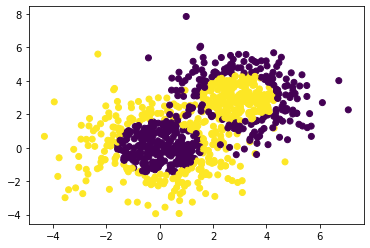

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [6]:
# 选择SAMME算法，最多200个弱分类器，步长0.8
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

#### 拟合完了后，我们用网格图来看看它拟合的区域。

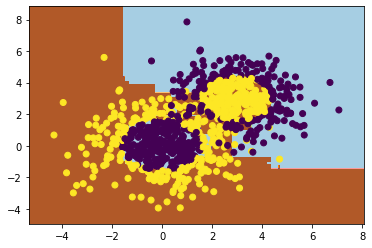

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [8]:
print("Score:", bdt.score(X,y))

Score: 0.9133333333333333


In [10]:
# 将最大弱分离器个数从200增加到300。再来看看拟合分数。
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9622222222222222


#### 这印证了我们前面讲的，弱分离器个数越多，则拟合程度越好，当然也越容易过拟合。
#### 现在我们降低步长，将步长从上面的0.8减少到0.5，再来看看拟合分数。

In [12]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.8944444444444445


#### 可见在同样的弱分类器的个数情况下，如果减少步长，拟合效果会下降。

#### 最后我们看看当弱分类器个数为700，步长为0.7时候的情况：

In [13]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=600, learning_rate=0.7)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9611111111111111


#### 此时的拟合分数和我们最初的300弱分类器，0.8步长的拟合程度相当。也就是说，在我们这个例子中，如果步长从0.8降到0.7，则弱分类器个数要从300增加到700才能达到类似的拟合效果。